# Clustering with Two Features from the Survey of Consumer Finances Data.(KMeans model)

In this project, i will build model to segment those households into distinct clusters, and examine the differences between those clusters.

**Importing Labraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

warnings.filterwarnings("ignore")

**Creating a Wrangle Function**

In [2]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    mask = df["FEARED07"] ==1
    df = df[mask]
    
    return df

In [4]:
df = wrangle(r"C:\Users\gbest\Desktop\my_project\consumer_finance_in_usa\SCFP2009.csv")
print(df.shape)
df.head()

(2248, 515)


,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,NHMORTPCT,WAGEINCPCT,BUSSEFARMINCPCT,INTDIVINCPCT,KGINCPCT,SSRETINCPCT,TRANSFOTHINCPCT,PSAVINGPCT,LEVERAGEPCT,I
35,8,81,9412.034171,49,3,12,2,1,1,3,...,60.0,-6.457549,0.0,0.0,0.0,0.0,0.0,382.812993,-15.401970,57
36,8,82,9296.095772,49,3,12,2,1,1,3,...,60.0,-6.457549,0.0,0.0,0.0,0.0,0.0,382.812993,-15.573788,57
37,8,83,9452.091830,49,3,12,2,1,1,3,...,60.0,-6.457549,0.0,0.0,0.0,0.0,0.0,382.812993,-15.805687,57
38,8,84,9075.983611,49,3,12,2,1,1,3,...,60.0,-6.457549,0.0,0.0,0.0,0.0,0.0,382.812993,-15.307817,57
39,8,85,9385.769811,49,3,12,2,1,1,3,...,60.0,-6.457549,0.0,0.0,0.0,0.0,0.0,382.812993,-15.336238,57


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2248 entries, 35 to 19254
Columns: 515 entries, YY1 to I
dtypes: float64(212), int64(303)
memory usage: 8.8 MB


#### Explore

We looked at a lot of different features of the "TURNFEAR" subset in the last lesson, and the last thing we looked at was the relationship between real estate and debt. To refresh our memory on what that relationship looked like, let's make that graph again.

Creating a scatter plot of that shows the total value of primary residence of a household ("HOUSES") as a function of the total value of household debt ("DEBT").

<Axes: xlabel='DEBT07', ylabel='HOUSES07'>

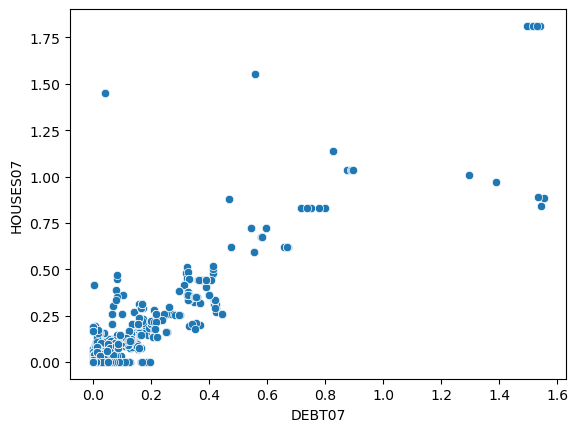

In [4]:
sns.scatterplot(x=df["DEBT07"]/1e6, y=df["HOUSES07"]/1e6)

### Split

i need to split the data, but i am not not going to need target vector or a test set this time around. That's because the model i will be building involves `unsupervised learning`. It's called `unsupervised` because the model doesn't try to map input to a set of labels or targets that already exist. It's kind of like how humans learn new skills, in that we don't always have models to copy. Sometimes, we just try out something and see what happens. Keep in mind that this doesn't make these models any less useful, it just makes them different.

Create the feature matrix X. It should contain two features only: "DEBT" and "HOUSES".

In [5]:
X = df[["DEBT07", "HOUSES07"]]
print(X.shape)
X.head()

(2248, 2)


,DEBT07,HOUSES07
35,59029.06597,103559.7649
36,59029.06597,103559.7649
37,59029.06597,103559.7649
38,59029.06597,103559.7649
39,59029.06597,103559.7649


Build a KMeans model, assign it to the variable name model, and fit it to the training data X

In [6]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

Extract the labels that the model created during training and assign them to the variable labels.

In [7]:
labels = model.labels_
labels[-10:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

 Recreate the "Home Value vs. Household Debt" scatter plot you made above, but with two changes. First, use seaborn to create the plot. Second, pass your labels to the hue argument, and set the palette argument to "deep".

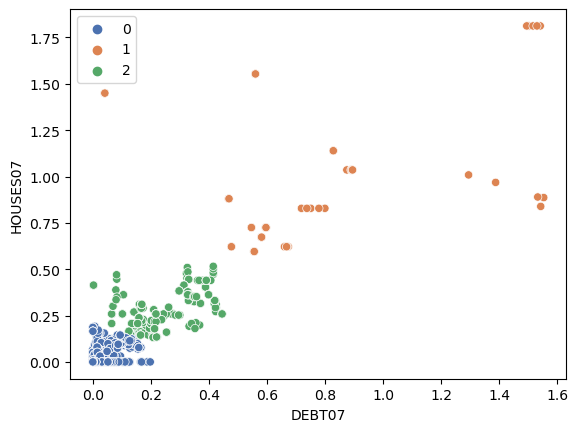

In [9]:
sns.scatterplot(
    x=df["DEBT07"]/1e6, 
    y=df["HOUSES07"]/1e6,
    hue=labels,
    palette="deep"
);

Extract the centroids that the model created during training, and assign them to the variable centroids.

In [10]:
centroids =  model.cluster_centers_
centroids

array([[ 26495.41657523,  21933.54795103],
       [710383.00131314, 969896.37499429],
       [230244.22477774, 269001.50018806]])

Recreate the seaborn "Home Value vs. Household Debt" scatter plot you just made, but with one difference: Add the centroids to the plot. Be sure to set the centroids color to "Black".

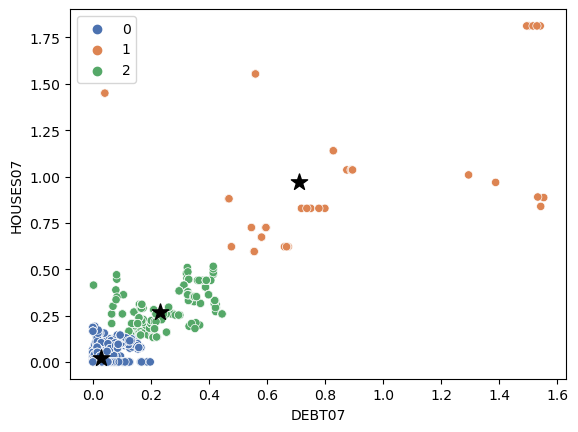

In [11]:
sns.scatterplot(
    x=df["DEBT07"]/1e6, 
    y=df["HOUSES07"]/1e6,
    hue=labels,
    palette="deep"
)
plt.scatter(
    x=centroids[:, 0]/1e6,
    y=centroids[:, 1]/1e6,
    color="black",
    marker="*",
    s=150
);

Extract the inertia for your model and assign it to the variable inertia and Calculate the Silhoutte Score.

In [12]:
inertia = model.inertia_
print("inertia:", inertia)

inertia: 31927936139297.242


In [13]:
ss = silhouette_score(X, labels)
print("silhouette score(3 cluster):", ss)

silhouette score(3 cluster): 0.7339478444330768


Using a for loop to build and train a K-Means model where n_clusters ranges from 2 to 12 (inclusive). Each time a model is trained, calculate the inertia and add it to the list inertia_errors, then calculate the silhouette score and add it to the list silhouette_score

In [14]:
n_clusters = range(2, 13)
inertia_error = []
silhouette_scores = []

for k in n_clusters:
    model = KMeans(n_clusters=k,random_state=40)
    model.fit(X)
    inertia_error.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X, model.labels_))
    
print("inertia:", inertia_error)
print()
print("silhouette score(3 cluster):", silhouette_scores)

inertia: [58936815544063.17, 31858235711697.473, 22586569764621.78, 16784756083098.797, 12287513668491.623, 9370857690960.74, 7166787108099.612, 5853919881583.1045, 4986702883131.242, 4285512457337.589, 3649592896648.4873]

silhouette score(3 cluster): [0.8232222017998266, 0.7388099526104908, 0.7099209075249026, 0.7095645615533787, 0.7053207270048596, 0.7089950738819055, 0.696354551229581, 0.697693548947784, 0.6991528875498775, 0.7007644260479988, 0.6831098341264856]


Now that i have both performance metrics for several different settings of n_clusters, let's make some line plots to see the relationship between the number of clusters in a model and its inertia and silhouette scores.

 Creating a line plot that shows the values of inertia_errors as a function of n_clusters.

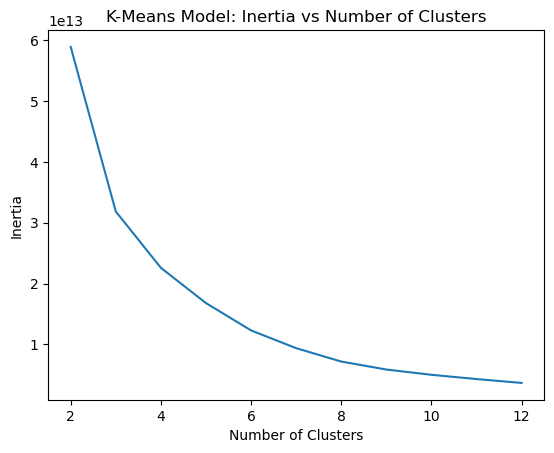

In [19]:
#plt.plot(n_clusters, inertia_error);

plt.plot(n_clusters, inertia_error)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs Number of Clusters");

What we're seeing here is that, as the number of clusters increases, inertia goes down. In fact, i could get inertia to 0 if we told our model to make over 4,000 clusters (the same number of observations in X), but those clusters wouldn't be helpful to us.

The trick with choosing the right number of clusters is to look for the "bend in the elbow" for this plot. In other words, we want to pick the point where the drop in inertia becomes less dramatic and the line begins to flatten out. In this case, it looks like the sweet spot is 4 or 5.

>Create a line plot that shows the values of silhouette_scores as a function of n_clusters. Be sure to label your x-axis "Number of Clusters", your y-axis "Silhouette Score", and use the title "K-Means Model: Silhouette Score vs Number of Clusters".

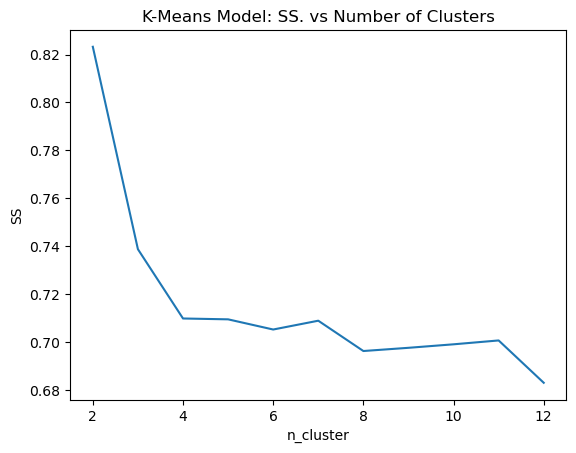

In [22]:
plt.plot(n_clusters, silhouette_scores)
plt.xlabel("n_cluster")
plt.ylabel("SS")
plt.title("K-Means Model: SS. vs Number of Clusters");

Note that, in contrast to our inertia plot, bigger is better. So we're not looking for a "bend in the elbow" but rather a number of clusters for which the silhouette score still remains high. We can see that silhouette score drops drastically beyond 4 clusters. Given this and what we saw in the inertia plot, it looks like the optimal number of clusters is 4.

>Building and training a new k-means model named final_model. Using the information gained from the two plots above to set an appropriate value for the n_clusters argument.

In [23]:
final_model = KMeans(n_clusters=4, random_state=42)
final_model.fit(X)

KMeans(n_clusters=4, random_state=42)

#### communicate Reault

Creating one last "Home Value vs. Household Debt" scatter plot that shows the clusters that your final_model has assigned to the training data

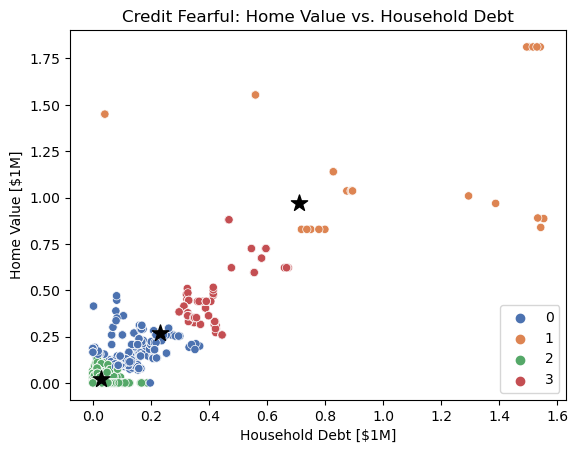

In [26]:
sns.scatterplot(
    x=df["DEBT07"]/1e6, 
    y=df["HOUSES07"]/1e6,
    hue=final_model.labels_,
    palette="deep"
)
plt.scatter(
    x=centroids[:, 0]/1e6,
    y=centroids[:, 1]/1e6,
    color="black",
    marker="*",
    s=150
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

Nice! We can see all four of our clusters, each differentiated from the rest by color.

>Creating a DataFrame xgb that contains the mean "DEBT" and "HOUSES" values for each of the clusters in your final_model.

In [27]:
xgb = X.groupby(final_model.labels_).mean()
xgb

,DEBT07,HOUSES07
0,135077.941358,1.681838e+05
1,864863.102558,1.248161e+06
2,16079.434520,8.250812e+03
3,418956.579550,4.660189e+05


In [28]:
final_model.cluster_centers_

array([[ 135077.94135825,  168183.77743293],
       [ 864863.10255771, 1248161.46324571],
       [  16079.43451962,    8250.8115543 ],
       [ 418956.5795504 ,  466018.9418792 ]])

>Creating a side-by-side bar chart from `xgb` that shows the mean "DEBT" and "HOUSES" values for each of the clusters in your final_model. For readability, you'll want to divide the values in xgb by 1 million. 

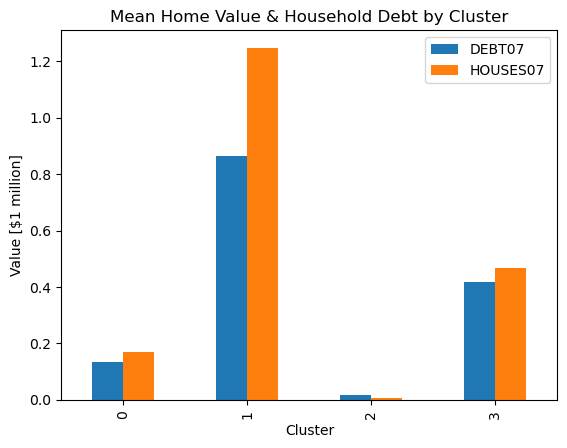

In [29]:
(xgb / 1e6).plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Value [$1 million]")
plt.title("Mean Home Value & Household Debt by Cluster");